# Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

Данные для работы находятся в нескольких таблицах. Нажмите на название файла, чтобы его скачать.
market_file.csv
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

market_money.csv
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

market_time.csv
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

money.csv
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

# Загрузка данных

Импортирование библиотек

In [48]:
!pip install phik -q
!pip install scikit-learn==1.5.0
!pip install shap

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer 
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
import shap

In [50]:
!pip list

Package                           Version
--------------------------------- ---------------
aext_assistant                    0.4.0
aext_assistant_server             0.4.0
aext_core                         0.4.0
aext_core_server                  0.4.0
aext_shared                       0.4.0
aiobotocore                       2.7.0
aiohttp                           3.9.0
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
anaconda-anon-usage               0.4.3
anaconda-client                   1.12.2
anaconda-cloud-auth               0.5.0
anaconda-navigator                2.6.1
anyio                             3.5.0
appdirs                           1.4.4
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens                         2.0.5
async-timeout          

Загрузка данных

In [51]:
try:
    market_file=pd.read_csv('/datasets/market_file.csv')
except FileNotFoundError:
    market_file=pd.read_csv('./market_file.csv')

In [52]:
try:
    market_money=pd.read_csv('/datasets/market_money.csv')
except FileNotFoundError:
    market_money=pd.read_csv('./market_money.csv')

In [53]:
try:
    market_time=pd.read_csv('/datasets/market_time.csv')
except FileNotFoundError:
    market_time=pd.read_csv('./market_time.csv')

In [54]:
try:
    money=pd.read_csv('/datasets/money.csv', delimiter=';')
except FileNotFoundError:
    money=pd.read_csv('./money.csv', delimiter=';')

Вывод первых строк 'market_file'

In [55]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Вывод первых строк 'market_money'

In [56]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Вывод первых строк 'market_time'

In [57]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Вывод первых строк 'money'

In [58]:
money.head()

,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float'

In [59]:
money['Прибыль']=money['Прибыль'].str.replace(',','.')
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [60]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


<b>Вывод:</b> 
- Были установлены и импортированны нужные для работы библиотеки.
- Были загружены данные.
- В датафрейме 'money', были перезаписаны запятые на точки, чтобы изменить тп данных.

# Предобработка данных

Приведем названия столбиков к нижнему регистру 'market_file'

In [61]:
market_file.columns = [col.lower() for col in market_file.columns]
market_file

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


In [62]:
market_file['популярная_категория'].str.replace('Косметика и аксесуары', 'Косметика и аксеcсуары')

0                     Товары для детей
1                     Товары для детей
2                    Домашний текстиль
3                     Товары для детей
4                     Товары для детей
                     ...              
1295    Техника для красоты и здоровья
1296                 Домашний текстиль
1297                 Домашний текстиль
1298    Техника для красоты и здоровья
1299    Техника для красоты и здоровья
Name: популярная_категория, Length: 1300, dtype: object

Приведем названия столбиков к нижнему регистру 'market_money'

In [63]:
market_money.columns = [col.lower() for col in market_money.columns]
market_money

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0


Приведем названия столбиков к нижнему регистру 'market_time'

In [64]:
market_time.columns = [col.lower() for col in market_time.columns]
market_time

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
...,...,...,...
2595,216645,текущий_месяц,18
2596,216646,предыдцщий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10


In [65]:
market_time['период']=market_time['период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')

Приведем названия столбиков к нижнему регистру 'money'

In [66]:
money.columns = [col.lower() for col in money.columns]
money

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
...,...,...
1295,216643,4.44
1296,216644,6.11
1297,216645,3.29
1298,216646,4.03


Просмотр и удаление неявных дубликатов

In [67]:
market_file.head(2)

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5


In [68]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская активность            1300 non-null   object 
 2   тип сервиса                          1300 non-null   object 
 3   разрешить сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

Вывод уникальных значений с типом столбиков 'object'

In [69]:
for column in market_file.select_dtypes(include=['object']):
    print(column, market_file[column].unique())

покупательская активность ['Снизилась' 'Прежний уровень']
тип сервиса ['премиум' 'стандартт' 'стандарт']
разрешить сообщать ['да' 'нет']
популярная_категория ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


А здесь проверим у одного столбика

In [70]:
market_file['тип сервиса']=market_file['тип сервиса'].str.replace('стандартт', 'стандарт')

In [71]:
market_money.head(2)

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1


In [72]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [73]:
market_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [74]:
market_time.head(2)

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13


In [75]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [76]:
money.head(2)

,id,прибыль
0,215348,0.98
1,215349,4.16


In [77]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


Замена типа данных

In [78]:
money['прибыль']=money['прибыль'].astype(float)

In [79]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Просмотр дубликатов

In [80]:
market_file.duplicated().sum()

0

In [81]:
market_money.duplicated().sum()

0

In [82]:
market_time.duplicated().sum()

0

In [83]:
money.duplicated().sum()

0

<b>Вывод:</b>
- Названия столбиков приведены к нижнему регистру.
- Была исправлена опечатка в 'market_time' в столбце "период".
- Исправлены неявныек дубликаты. 
- Изменен тип данных в 'money' в столбце "прибыль".
- Явных дубликатов не обнаружено.

# Исследовательский анализ данных

Создадим цикл для построения гистограмм и графиков боксплота. Переберем все количественные признаки в 'market_file', исключив 'id'

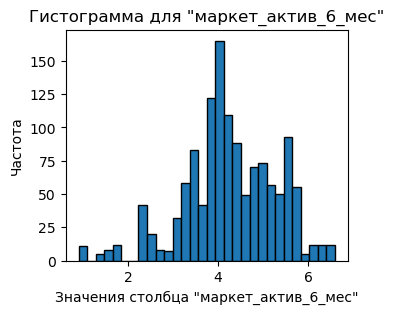

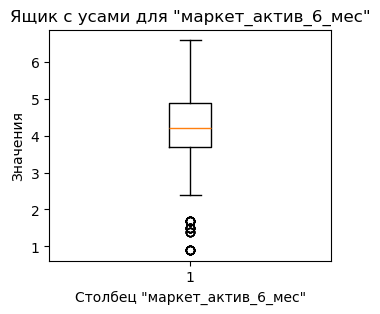

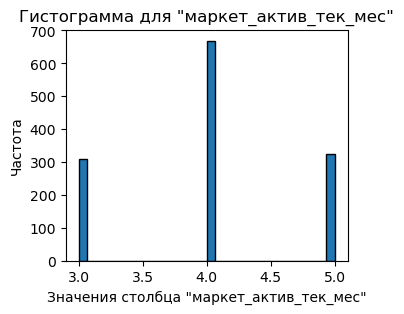

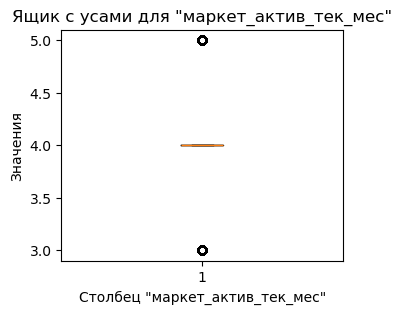

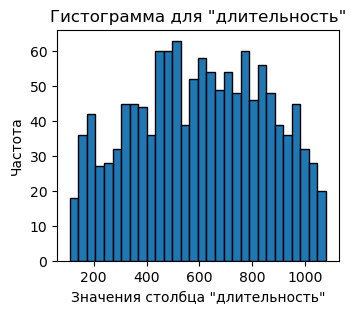

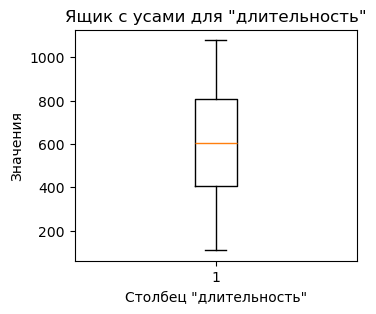

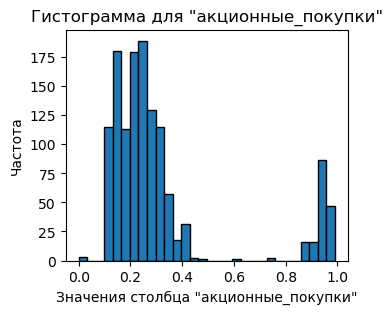

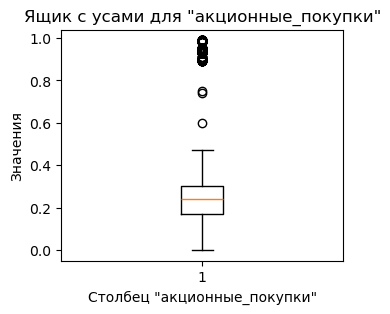

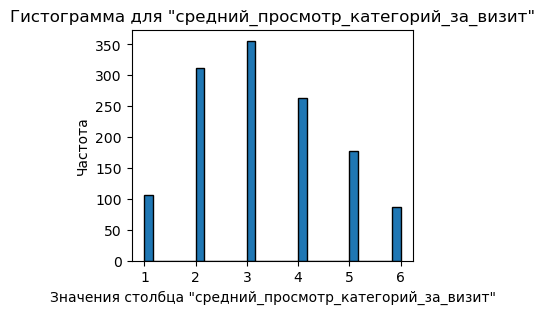

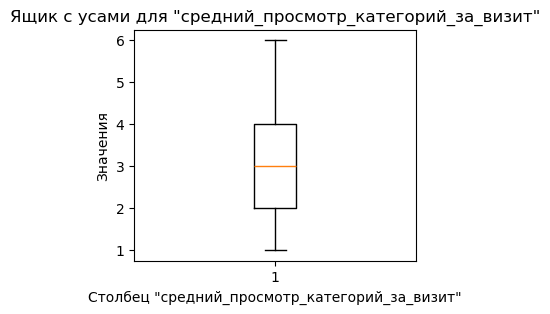

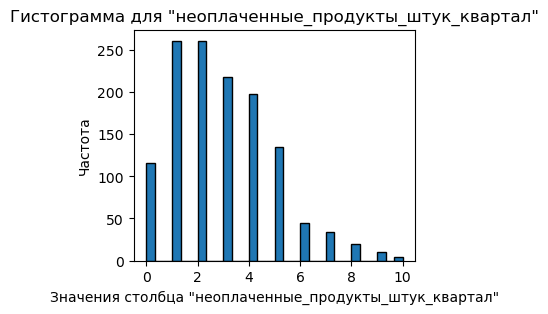

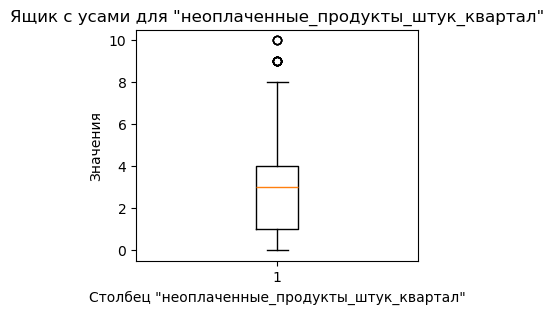

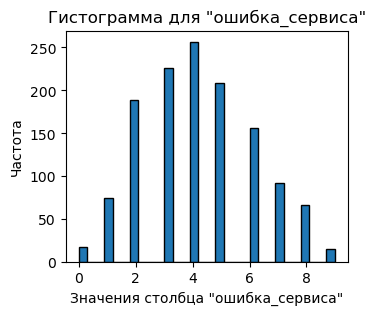

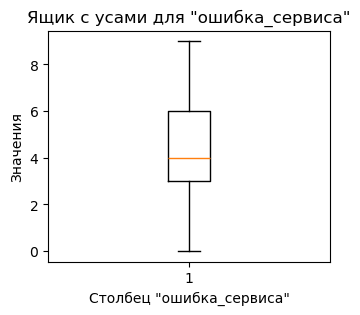

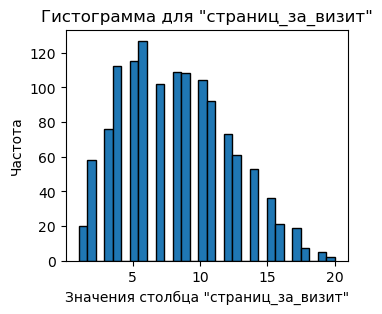

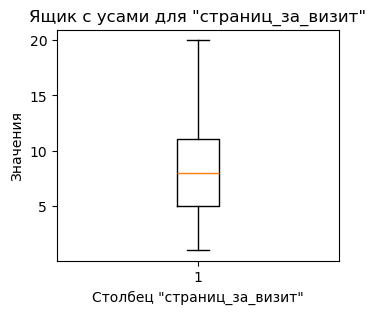

In [84]:
for column in market_file.select_dtypes(include=['int64', 'float64']):
    if 'id' in column.lower():  
        continue 
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.hist(market_file[column], bins=30, edgecolor='black')
    plt.xlabel(f'Значения столбца "{column}"')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма для "{column}"')
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.boxplot(market_file[column])
    plt.xlabel(f'Столбец "{column}"')
    plt.ylabel('Значения')
    plt.title(f'Ящик с усами для "{column}"');

Создадим цикл для построение круговых диаграмм. Переберем категориальные признаки в 'market_file'

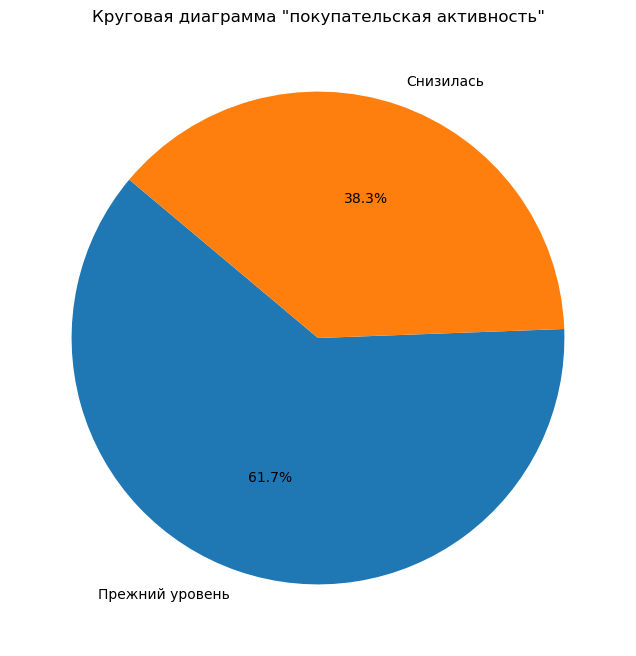

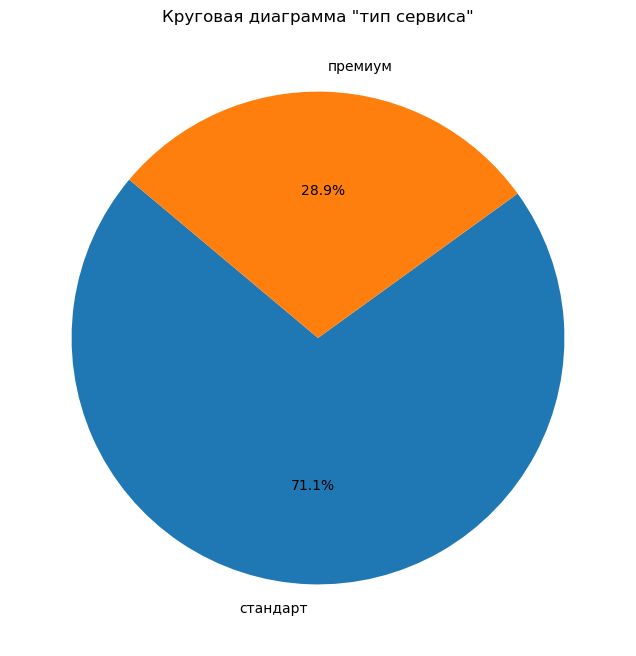

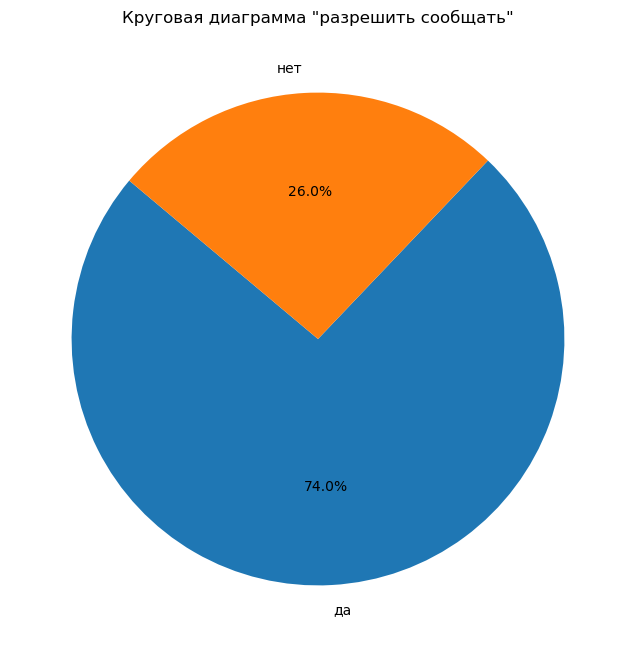

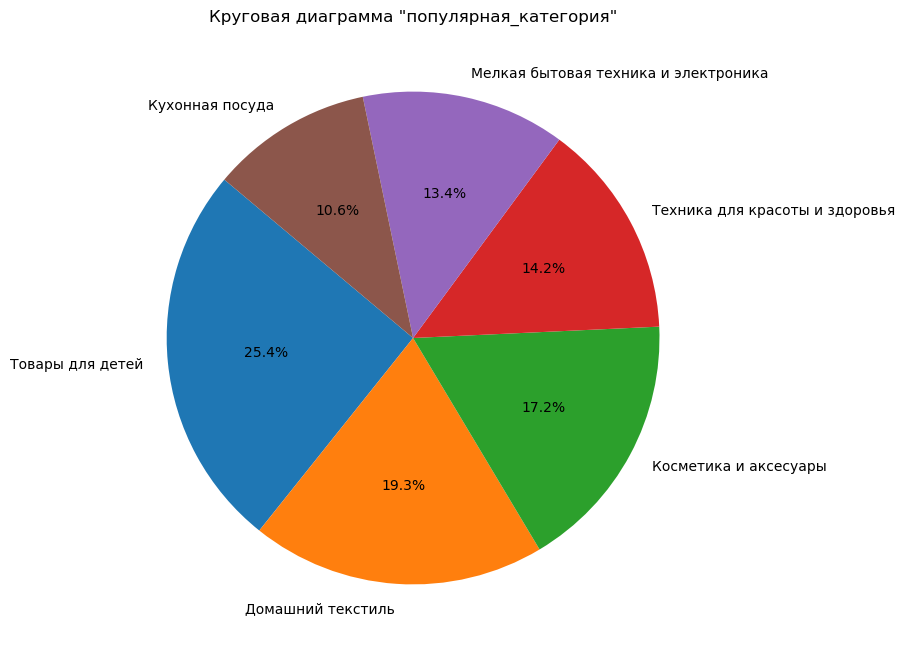

In [85]:
for column in market_file.select_dtypes(include=['object']):
    counts = market_file[column].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(counts,  labels=counts.index,  autopct='%1.1f%%',  startangle=140)
    plt.title(f'Круговая диаграмма "{column}"')

Построим гистограмму и график боксплота для 'market_money' по столбцу "выручка"

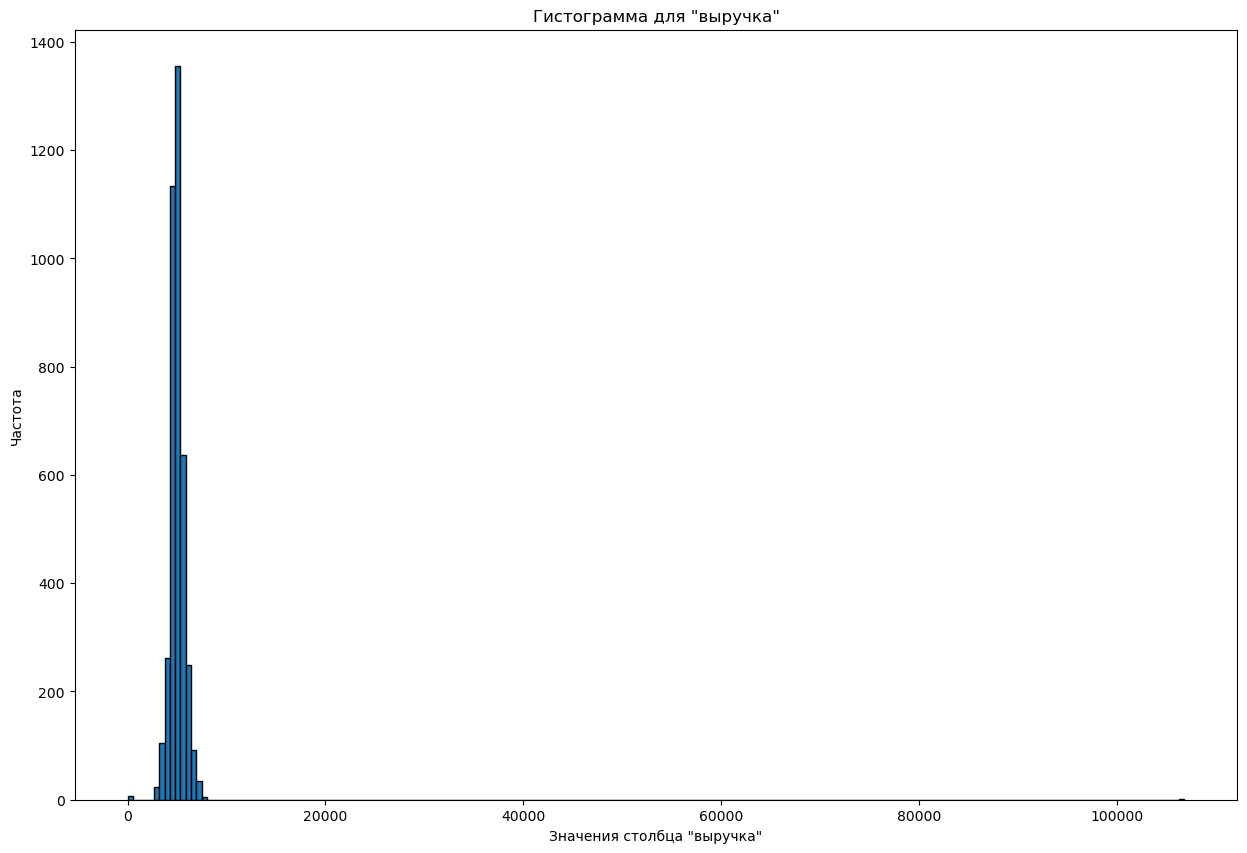

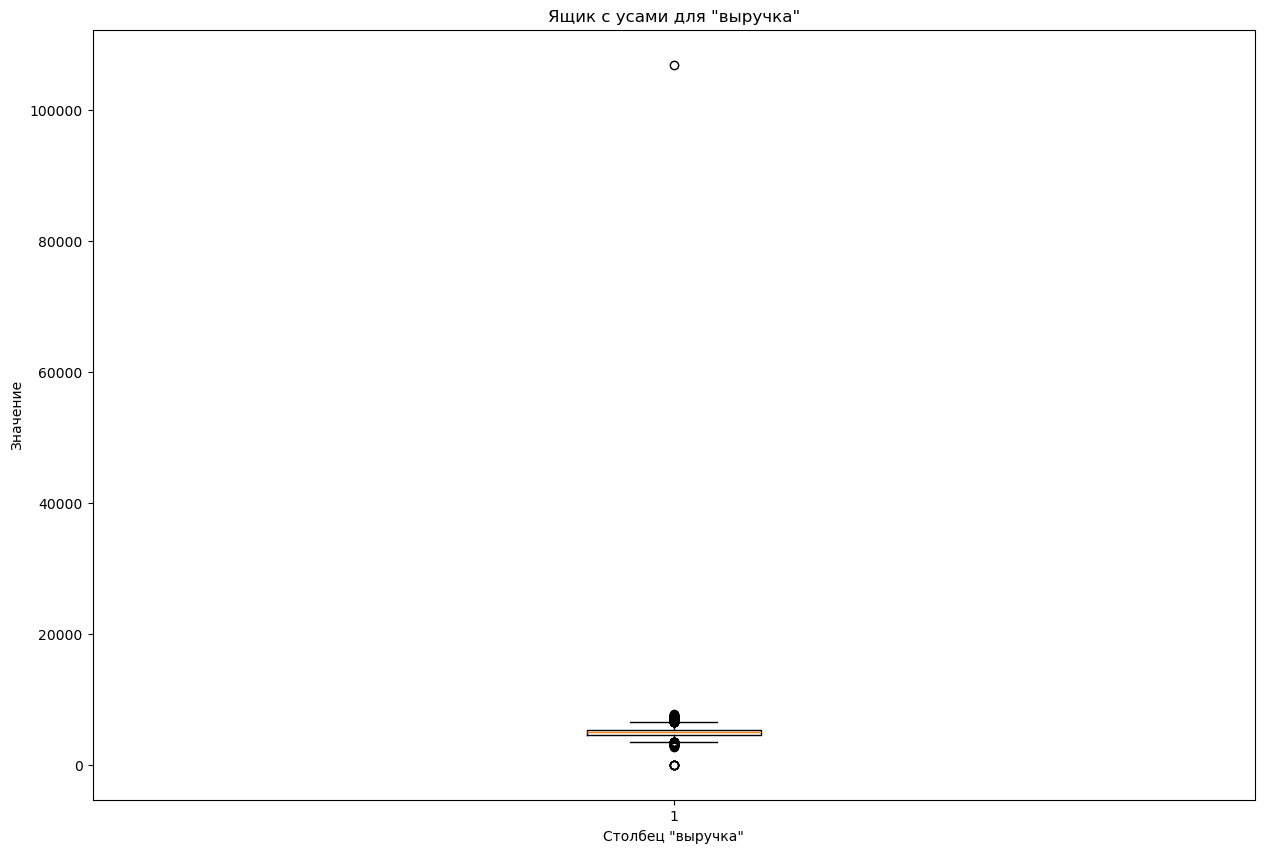

In [86]:
plt.figure(figsize=(15, 10))
plt.hist(market_money['выручка'], bins=200, edgecolor='black')  
plt.xlabel('Значения столбца "выручка"')
plt.ylabel('Частота')
plt.title('Гистограмма для "выручка"');
plt.figure(figsize=(15, 10))
plt.boxplot(market_money['выручка'])  
plt.xlabel('Столбец "выручка"')
plt.ylabel('Значение')
plt.title('Ящик с усами для "выручка"');

На графиках видно явный выброс. Посмотри на аномальные значения. Отсортируем данные по графику 'выручка'

In [87]:
market_money.sort_values(['выручка'], ascending=False)

,id,период,выручка
98,215380,текущий_месяц,106862.2
435,215493,текущий_месяц,7799.4
262,215435,текущий_месяц,7605.3
1481,215841,текущий_месяц,7557.0
2388,216144,текущий_месяц,7547.8
...,...,...,...
34,215359,предыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0


Замечено очень большое значение. Выведем его отдельно

In [88]:
market_money['выручка'].max()

106862.2

Выведем нижние выбросы

In [89]:
market_money.sort_values(['выручка'], ascending=True)

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
...,...,...,...
2388,216144,текущий_месяц,7547.8
1481,215841,текущий_месяц,7557.0
262,215435,текущий_месяц,7605.3
435,215493,текущий_месяц,7799.4


Для наглядности покажем их отдельно

In [90]:
market_money.loc[market_money['выручка']==0]

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


Избавимся от выбросов

In [91]:
market_money=market_money.loc[market_money['выручка']!=106862.2]

In [92]:
market_money=market_money.loc[market_money['выручка']!=0]

Далее нам нужно будет убрать этих людей из всех датафреймов id(215348, 215357, 215359, 215380)

Посмотрим как выглядт графики после удаления выбросов

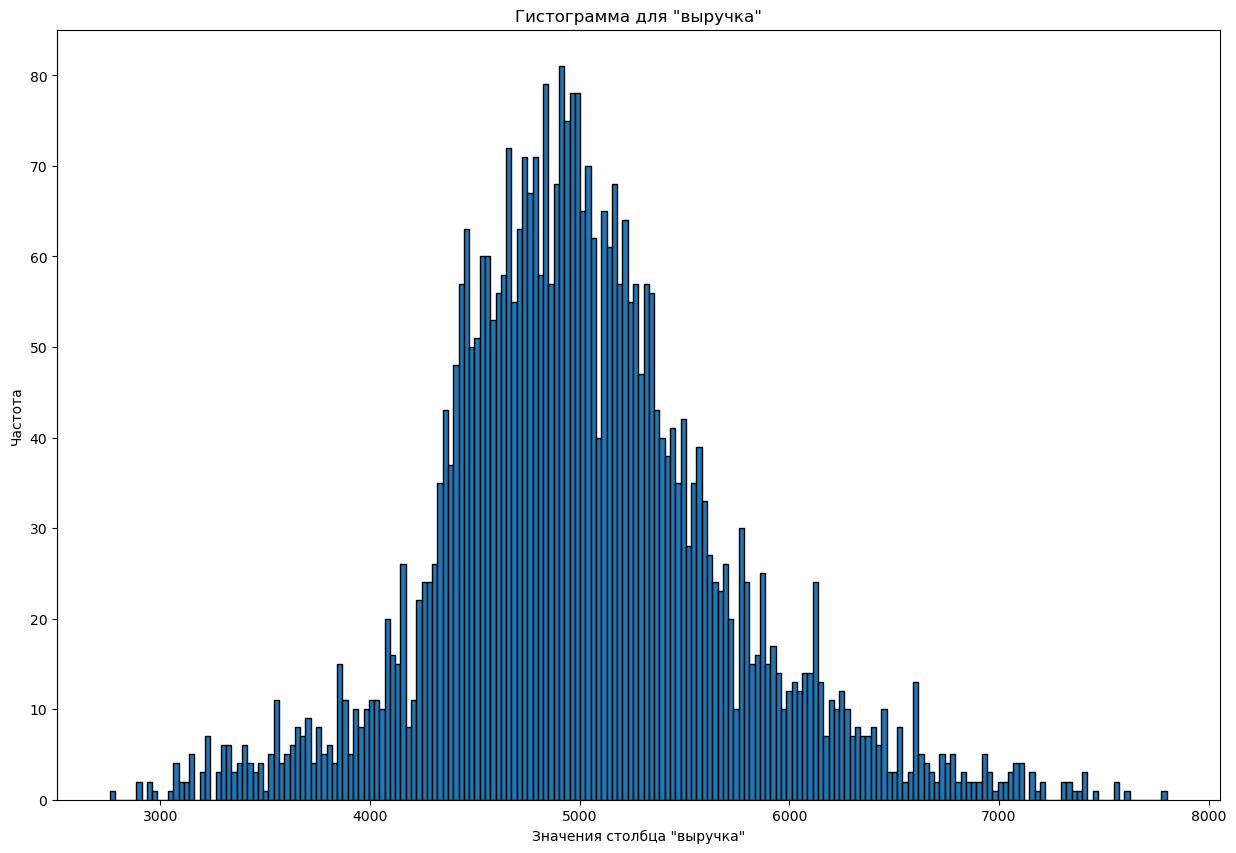

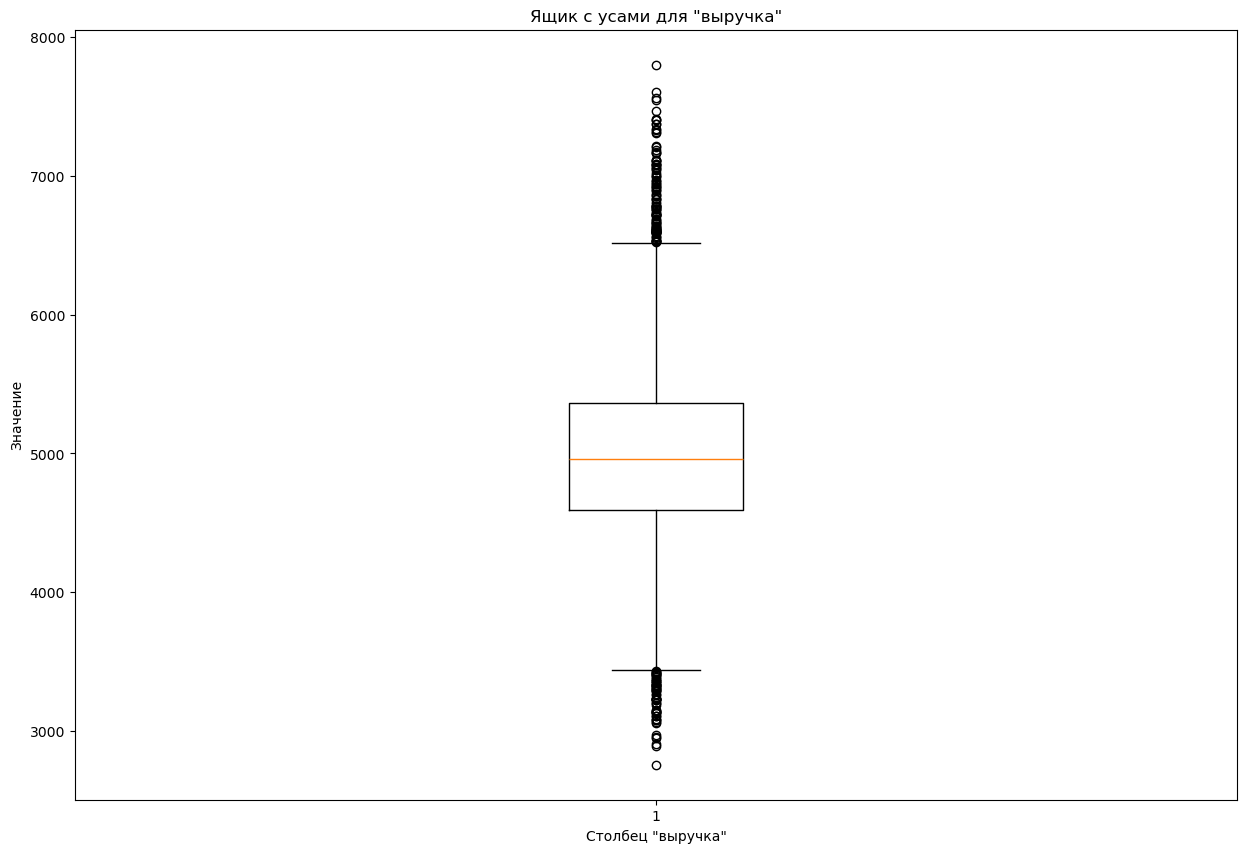

In [93]:
plt.figure(figsize=(15, 10))
plt.hist(market_money['выручка'], bins=200, edgecolor='black')  
plt.xlabel('Значения столбца "выручка"')
plt.ylabel('Частота')
plt.title('Гистограмма для "выручка"');
plt.figure(figsize=(15, 10))
plt.boxplot(market_money['выручка'])  
plt.xlabel('Столбец "выручка"')
plt.ylabel('Значение')
plt.title('Ящик с усами для "выручка"');

Гистограмма имеент нормальное распределение график боксплота тоже выглядит нормально

Построим круговую диаграмму для категориальных признаков 

Text(0.5, 1.0, 'Круговая диаграмма "период"')

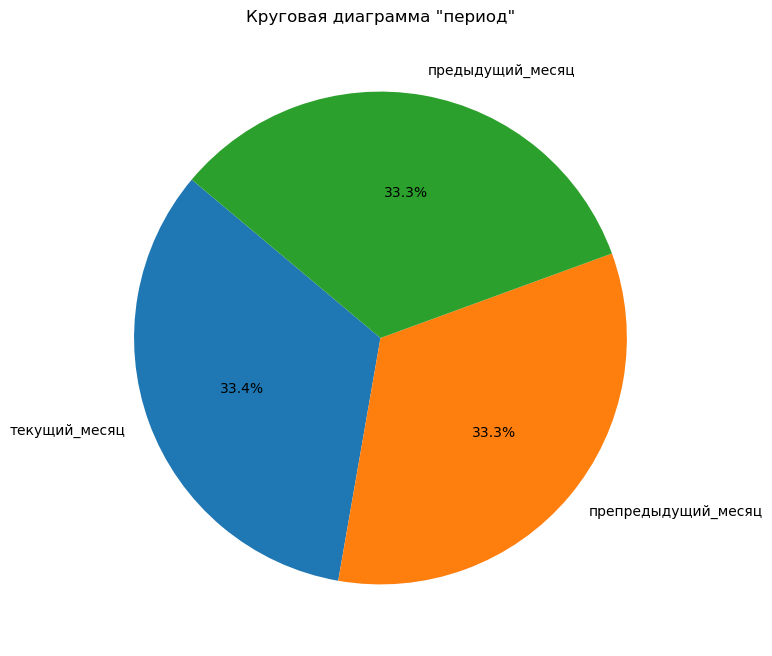

In [94]:
plt.figure(figsize=(8, 8))
plt.pie(market_money['период'].value_counts(), labels=market_money['период'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title(f'Круговая диаграмма "период"')

Построим гистограму и график боксплота для 'market_time' по столбику 'минут'

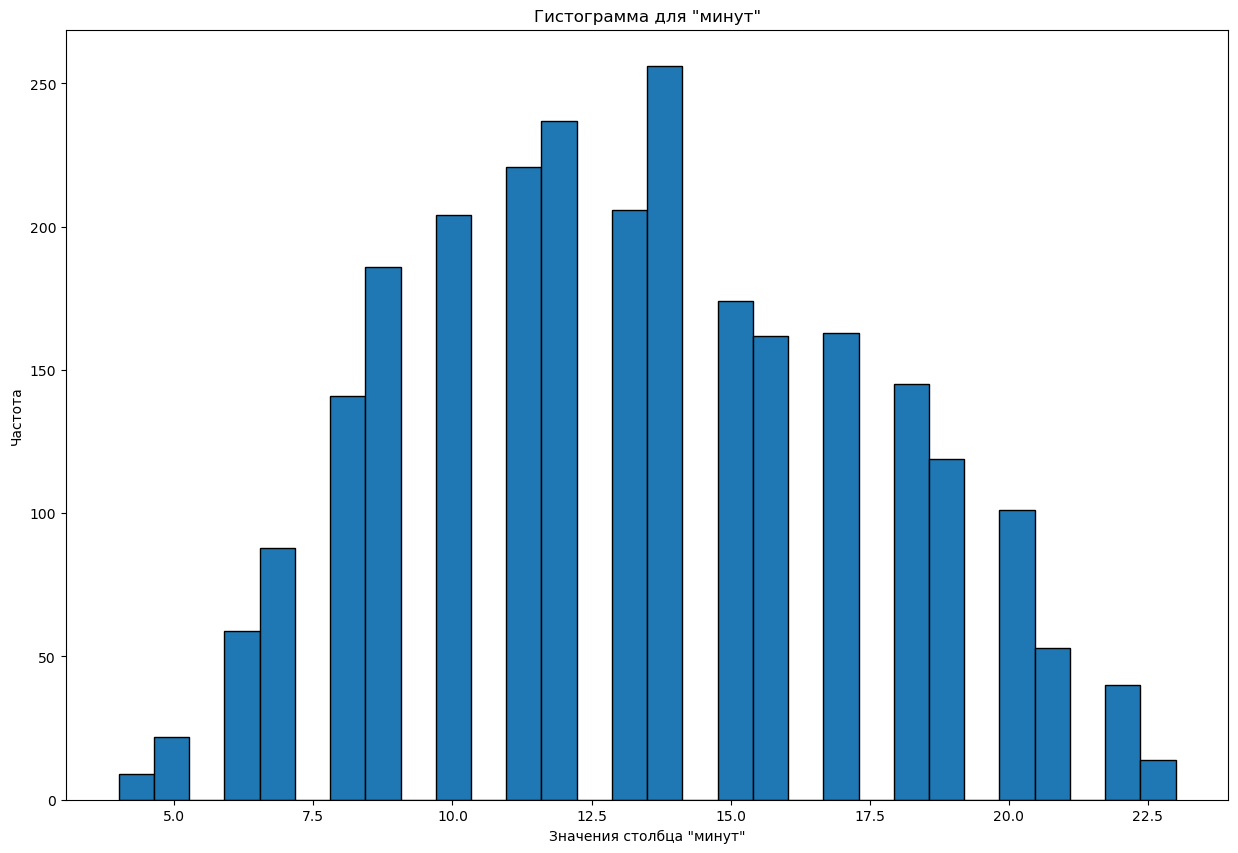

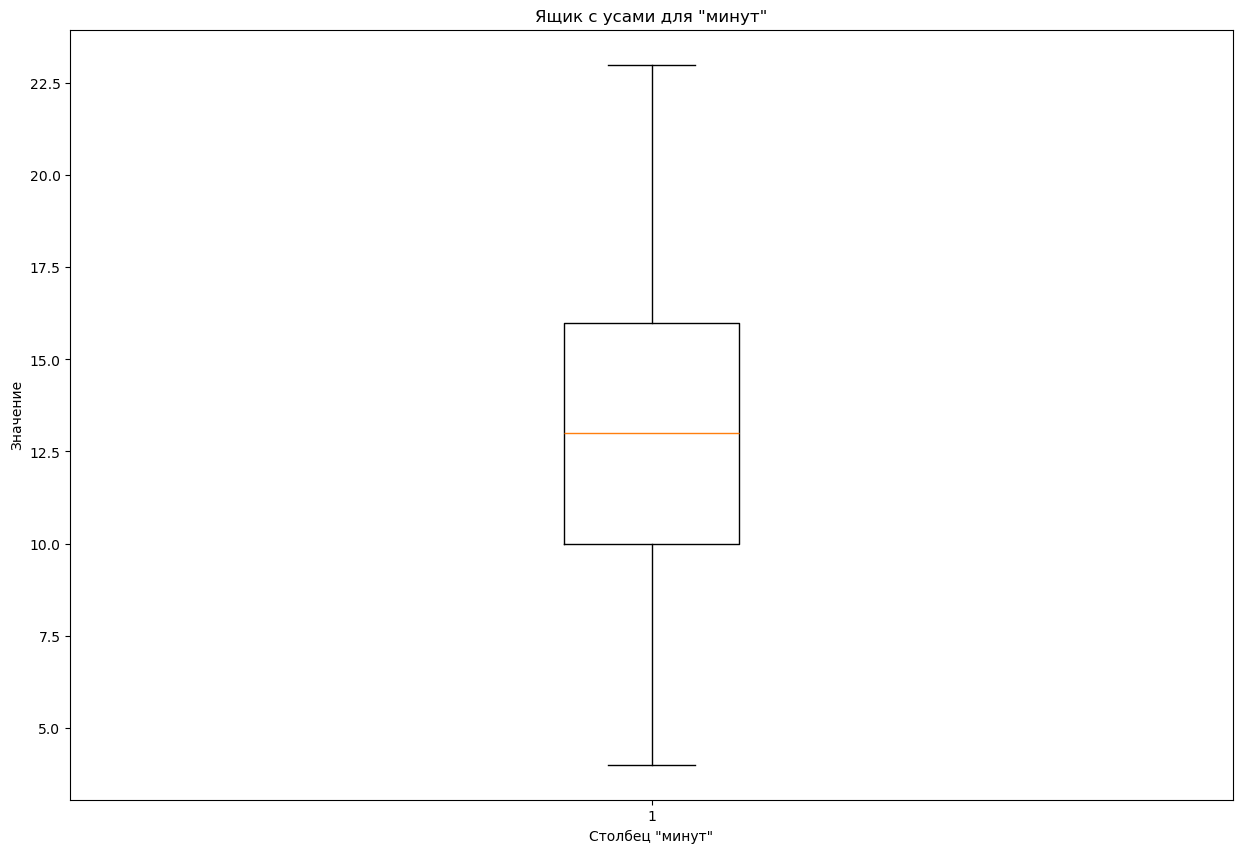

In [95]:
plt.figure(figsize=(15, 10))
plt.hist(market_time['минут'], bins=30, edgecolor='black')  
plt.xlabel('Значения столбца "минут"')
plt.ylabel('Частота')
plt.title('Гистограмма для "минут"');
plt.figure(figsize=(15, 10))
plt.boxplot(market_time['минут'])  
plt.xlabel('Столбец "минут"')
plt.ylabel('Значение')
plt.title('Ящик с усами для "минут"');

Вывод круговой диаграммы для столбика 'период'

Text(0.5, 1.0, 'Круговая диаграмма "период"')

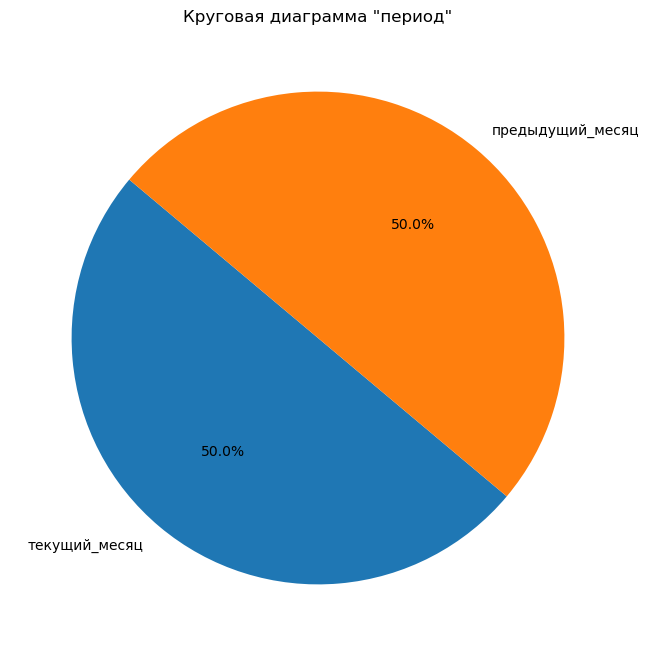

In [96]:
plt.figure(figsize=(8, 8))
plt.pie(market_time['период'].value_counts(), labels=market_time['период'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title(f'Круговая диаграмма "период"')

Построение гистограммы и графика боксплота для 'money' по столбику 'прибыль'

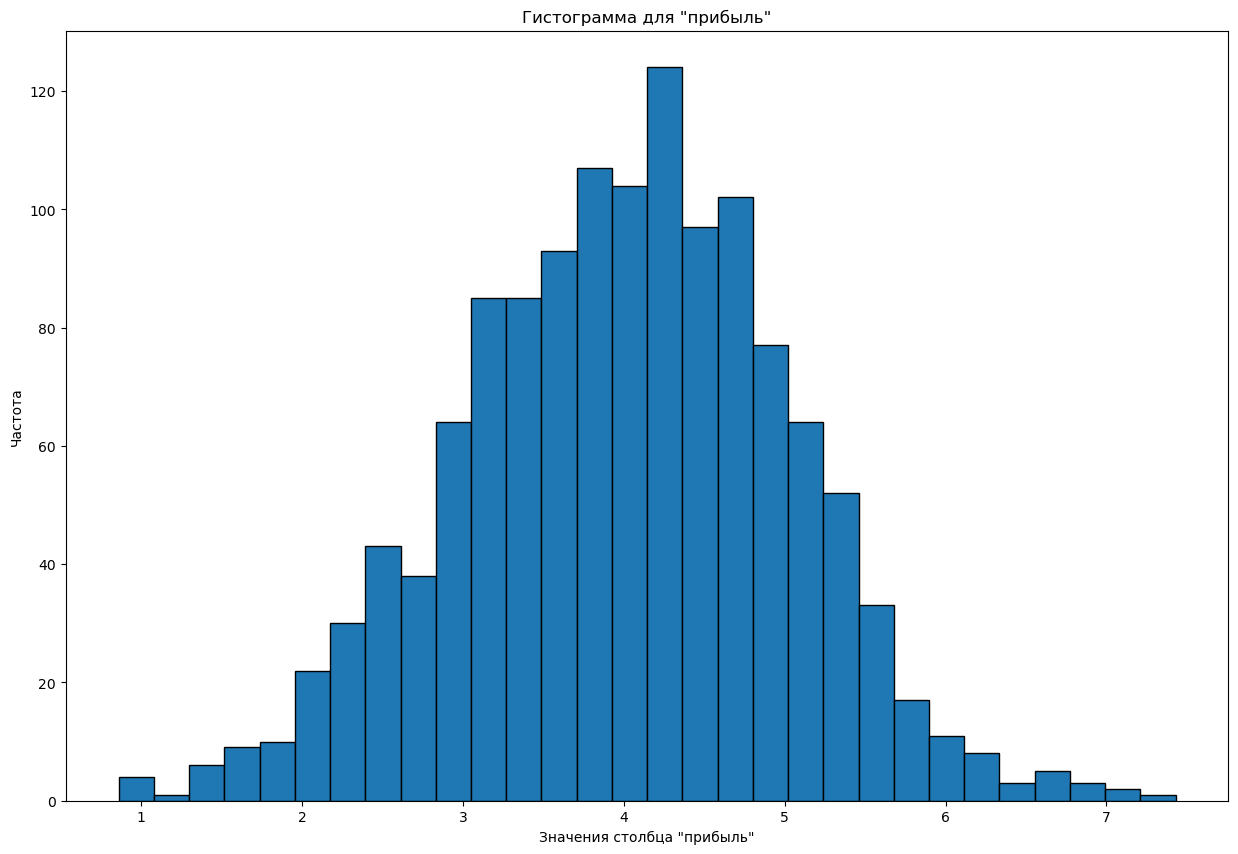

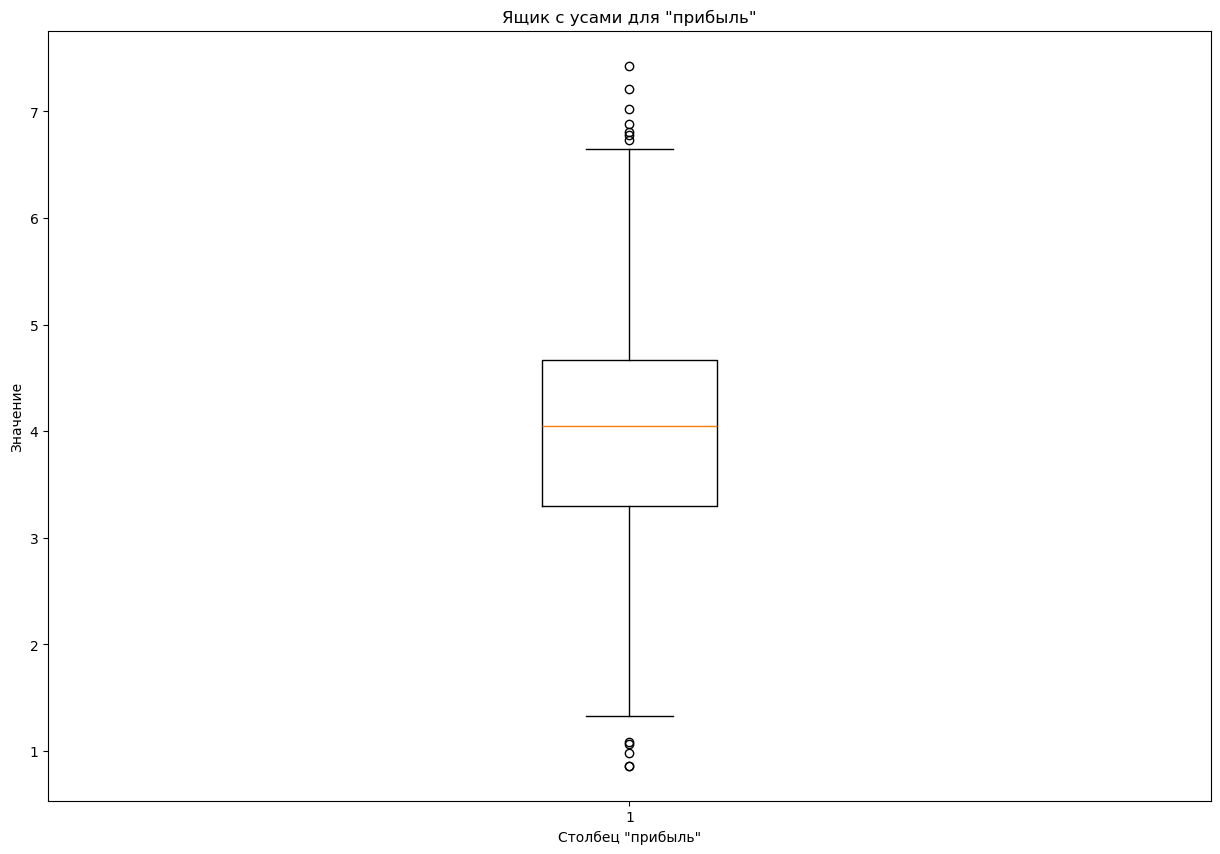

In [97]:
plt.figure(figsize=(15, 10))
plt.hist(money['прибыль'], bins=30, edgecolor='black')  
plt.xlabel('Значения столбца "прибыль"')
plt.ylabel('Частота')
plt.title('Гистограмма для "прибыль"');
plt.figure(figsize=(15, 10))
plt.boxplot(money['прибыль'])  
plt.xlabel('Столбец "прибыль"')
plt.ylabel('Значение')
plt.title('Ящик с усами для "прибыль"');

Удаление из датафреймов клиентов с покупательской активностью менее трёх месяцев

In [98]:
market_money = market_money[
    (market_money['id'] != 215348) &
    (market_money['id'] != 215357) &
    (market_money['id'] != 215359) &
    (market_money['id'] != 215380)
]

market_file = market_file[
    (market_file['id'] != 215348) &
    (market_file['id'] != 215357) &
    (market_file['id'] != 215359) &
    (market_file['id'] != 215380)
]

market_time = market_time[
    (market_time['id'] != 215348) &
    (market_time['id'] != 215357) &
    (market_time['id'] != 215359) &
    (market_time['id'] != 215380)
]

money = money[
    (money['id'] != 215348) &
    (money['id'] != 215357) &
    (money['id'] != 215359) &
    (money['id'] != 215380)
]

Убедимся в выполненной работе

In [99]:
market_file.loc[market_file['id']==215359]

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит


<b>Вывод:</b>
- Были построены гистограммы и графики боксплота для всех численных признаков.
- Были построены круговые диаграммы для категориальных признаков.
- В датафрейме 'market_money' по столбцу "выручка" были удалены выбросы. 
- Были устранены клиенты с покупательской активностью менее трёх месяцев.

    Распределение признаков маркет_актив_6_мес, акционные_покупки, популярная_категория, неоплаченные_продукты_штук_квартал, страниц_за_визит значительно различается между покупателями, у которых покупательская активность снизилась, и теми, у кого она осталась на прежнем уровне. В частности, признаки маркет_актив_6_мес, популярная_категория, страниц_за_визит имеют более низкие значения у покупателей со сниженной активностью по сравнению с теми, кто сохранил свой уровень активности. В то же время, признаки акции и неоплаченные_продукты_штук_квартал демонстрируют более высокие значения у покупателей, активность которых снизилась.
    Стоит отметить, что в отношении целевого признака не наблюдается критических различий в значениях категориальных признаков

# Объединение таблиц

In [100]:
merged_df = pd.merge(market_file, market_money, on='id')
data_all = merged_df.pivot(index='id', columns='период', values='выручка').reset_index()
data_all = pd.merge(market_file, data_all, on='id')
data_all

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7
1292,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0
1293,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2
1294,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6


In [101]:
market_time.head()

,id,период,минут
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдущий_месяц,8
6,215351,текущий_месяц,13


In [102]:
merged_df = pd.merge(data_all, market_time, on='id')
data_all1 = merged_df.pivot(index='id', columns='период', values='минут').reset_index()
data_all = pd.merge(data_all, data_all1, on='id')
data_all

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_x,препредыдущий_месяц,текущий_месяц_x,предыдущий_месяц_y,текущий_месяц_y
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1292,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1293,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1294,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


In [103]:
data_all=data_all.rename(columns={'предыдущий_месяц_x': 'предыдущий_месяц_выручка','препредыдущий_месяц': 'препредыдущий_месяц_выручка','текущий_месяц_x': 'текущий_месяц_выручка','предыдущий_месяц_y': 'предыдущий_месяц_минут', 'текущий_месяц_y':'текущий_месяц_минут'})
data_all

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1292,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1293,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1294,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


<b>Вывод:</b>
- Были обьединины таблицы по столбцу 'id'.
- Созданы столбцы: 'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка', 'текущий_месяц_выручка', 'предыдущий_месяц_минут', 'текущий_месяц_минут'.

# Корреляционный анализ

In [104]:
data_all.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


Создадим список с численными признаками для построения матрицы корреляции

In [105]:
interval_cols=[]
for column in data_all.select_dtypes(include=['int64', 'float64']):
    if 'id' not in column.lower():  
        interval_cols.append(column)

Просмотр списка

In [106]:
interval_cols

['маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит',
 'предыдущий_месяц_выручка',
 'препредыдущий_месяц_выручка',
 'текущий_месяц_выручка',
 'предыдущий_месяц_минут',
 'текущий_месяц_минут']

In [107]:
numeric_data = data_all[interval_cols]
numeric_data.head(1)

,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут
0,4.4,4,819,0.75,4,4,2,5,5216.0,4472.0,4971.6,12,10


Построим матрицу корреляции

In [108]:
phik_matrix = numeric_data.phik_matrix(interval_cols=interval_cols)
phik_matrix

Для наглядности выведем 'heatmap'

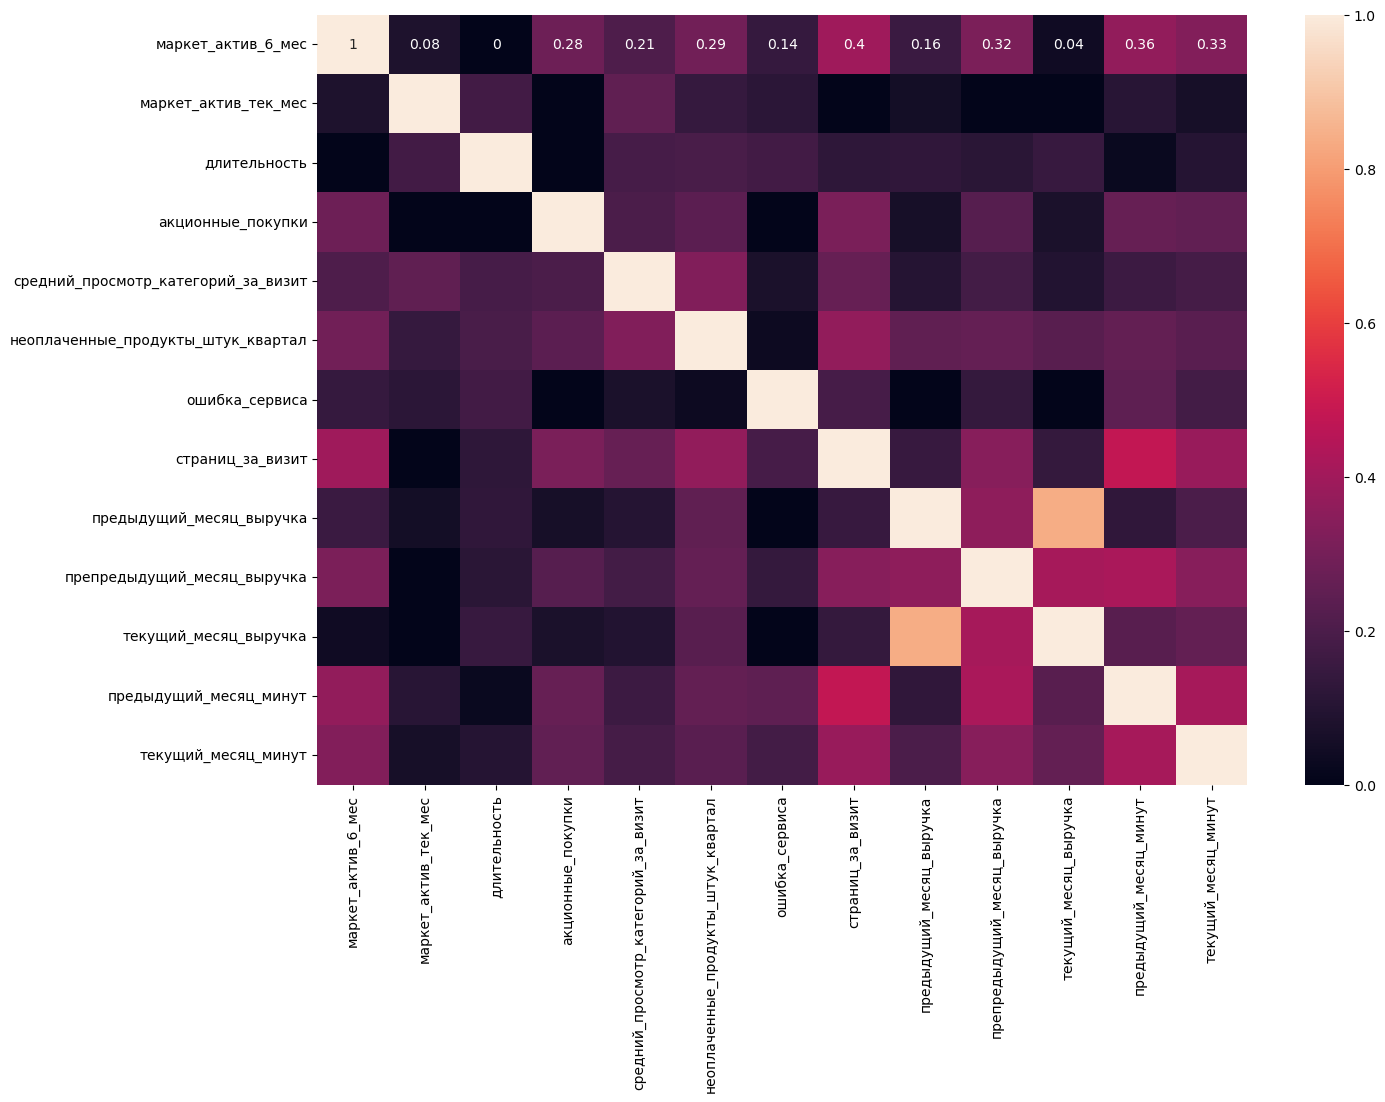

In [109]:
plt.figure(figsize = (15,10))
sns.heatmap(phik_matrix, annot=True);

<b>Вывод:</b> Сильная корреляция, как можно заметить на гафике 'heatmap' имеет предыдущая месячная выручка с текущей вырочкой в месяц.

# Использование пайплайнов

In [110]:
data_all.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [111]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

Разбиение выборки на тестовую и тренировочную

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    data_all.drop(['покупательская активность', 'id'], axis=1),
    data_all['покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = data_all['покупательская активность'])

Преобразование тренировочных и тестовых данных

In [113]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Выявление категориальных признаков

In [114]:
categorical_columns=[]
for column in data_all.select_dtypes(include=['object']):
    if 'покупательская активность' not in column.lower():  
        categorical_columns.append(column)

In [115]:
categorical_columns

['тип сервиса', 'разрешить сообщать', 'популярная_категория']

Выявление числовых признаков

In [116]:
numerical_columns=interval_cols

In [117]:
numerical_columns

['маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит',
 'предыдущий_месяц_выручка',
 'препредыдущий_месяц_выручка',
 'текущий_месяц_выручка',
 'предыдущий_месяц_минут',
 'текущий_месяц_минут']

Создание пайплайнов, для предобработки данных

In [118]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', 
         SimpleImputer(missing_values=np.nan, strategy='most_frequent')), 
        ('ohe', 
         OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [119]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ], 
    remainder='passthrough'
)

In [120]:
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [121]:
param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'], 
    'models': [DecisionTreeClassifier(random_state=RANDOM_STATE),
               KNeighborsClassifier(),
               SVC(random_state=RANDOM_STATE, probability=True),
               LogisticRegression(random_state=RANDOM_STATE)]
}

In [122]:
param_distributions = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]   
    },
    
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
    
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__solver': ['lbfgs'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
] 

Поиск наилучших параметров

In [123]:
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1
)

grid.fit(X_train, y_train)

grid.best_params_

{'models': SVC(probability=True, random_state=42),
 'preprocessor__num': StandardScaler()}

Лучшая модель оказалась SVC

In [124]:
grid.best_score_

0.9083356265356265

Поиск наилучших параметров

In [125]:
grid1 = GridSearchCV(
    pipe_final, 
    param_grid=param_distributions, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1, 
)

grid1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['тип '
                                                                          'сервиса',
                                                                          'разрешить '
                                                                          'сообщать',
                                                                          'популярная_категория']),
                                                                        ('nu...
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [SVC(probability=True, random_state=42)],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [LogisticRegression(random_state=42)],
                          'models__solver': ['lbfgs'],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring='roc_auc')

In [126]:
grid1.best_score_

0.9083356265356265

In [127]:
grid1.best_params_

{'models': SVC(probability=True, random_state=42),
 'preprocessor__num': StandardScaler()}

Лучшая метрика оказалась SVC

In [128]:
y_pred = grid1.predict_proba(X_test)

- 1 сниженный уровень активности
- 0 хороший уровень активности 

In [129]:
y_pred

array([[9.59672488e-01, 4.03275117e-02],
       [3.39297016e-02, 9.66070298e-01],
       [8.41020375e-01, 1.58979625e-01],
       [4.44832787e-02, 9.55516721e-01],
       [7.16350269e-01, 2.83649731e-01],
       [9.16526306e-01, 8.34736939e-02],
       [9.78535267e-01, 2.14647332e-02],
       [9.68827688e-01, 3.11723118e-02],
       [9.16411786e-01, 8.35882135e-02],
       [9.61622710e-01, 3.83772898e-02],
       [2.03839522e-01, 7.96160478e-01],
       [9.15296205e-01, 8.47037950e-02],
       [5.05066895e-03, 9.94949331e-01],
       [8.38338703e-01, 1.61661297e-01],
       [8.96551381e-01, 1.03448619e-01],
       [9.37437864e-01, 6.25621357e-02],
       [8.10442251e-01, 1.89557749e-01],
       [9.70148150e-01, 2.98518502e-02],
       [2.46656630e-02, 9.75334337e-01],
       [9.03859957e-01, 9.61400433e-02],
       [9.30725453e-01, 6.92745469e-02],
       [9.36201371e-03, 9.90637986e-01],
       [2.86920223e-02, 9.71307978e-01],
       [9.65703133e-01, 3.42968665e-02],
       [9.428612

Расчет ROC AUC. Так как метрика ROC AUC используется для оценки качества бинарных классификаторов, а у нас именно такой случай. 

In [130]:
roc_auc = roc_auc_score(y_test, y_pred[:, 1])
roc_auc

0.9124701694778142

In [131]:
X_train

,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут
506,стандарт,да,5.5,4,510,0.15,Мелкая бытовая техника и электроника,2,4,7,16,5170.5,4347.0,6014.2,20,6
10,стандарт,да,5.1,4,199,0.23,Техника для красоты и здоровья,4,5,2,3,6400.0,4597.0,3789.7,11,13
532,стандарт,да,4.3,5,997,0.17,Мелкая бытовая техника и электроника,5,1,3,11,4113.0,4626.0,3798.4,13,10
1212,стандарт,да,5.6,4,342,0.94,Кухонная посуда,2,7,5,8,4930.0,5269.0,4766.2,14,19
363,премиум,да,3.6,5,873,0.39,Товары для детей,3,2,2,5,3716.0,4691.0,4600.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,стандарт,да,4.0,3,432,0.16,Косметика и аксесуары,4,1,2,13,5646.5,4685.0,6609.8,17,22
825,стандарт,да,3.5,4,666,0.21,Мелкая бытовая техника и электроника,2,2,2,8,4667.0,5132.0,4394.0,21,18
583,стандарт,да,5.3,4,352,0.13,Товары для детей,1,7,3,10,5371.5,5274.0,5586.0,15,19
511,стандарт,нет,4.6,4,900,0.16,Мелкая бытовая техника и электроника,5,0,8,8,4862.0,4985.0,4885.4,18,20


In [132]:
X_train.dtypes

тип сервиса                             object
разрешить сообщать                      object
маркет_актив_6_мес                     float64
маркет_актив_тек_мес                     int64
длительность                             int64
акционные_покупки                      float64
популярная_категория                    object
средний_просмотр_категорий_за_визит      int64
неоплаченные_продукты_штук_квартал       int64
ошибка_сервиса                           int64
страниц_за_визит                         int64
предыдущий_месяц_выручка               float64
препредыдущий_месяц_выручка            float64
текущий_месяц_выручка                  float64
предыдущий_месяц_минут                   int64
текущий_месяц_минут                      int64
dtype: object

<b>Вывод:</b>

- Были разделены данные
- Были созданы пайплайны для предобработки данных
- Выявлена лучшая метрика

# Анализ важности признаков

С помощью SHAP построим сводный график важности признаков

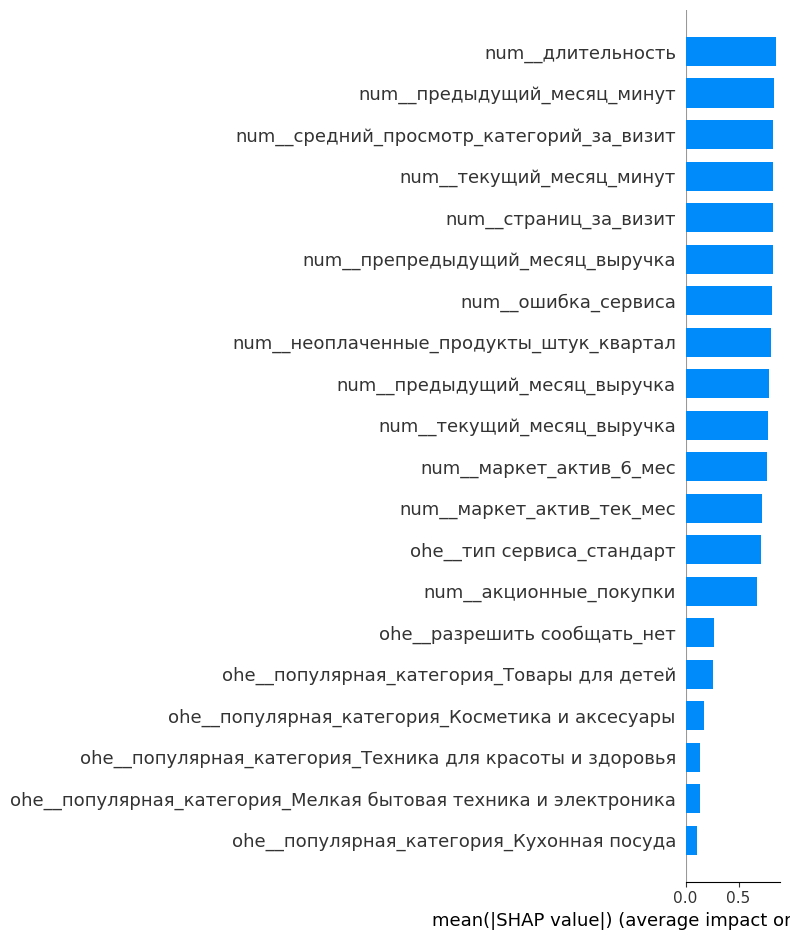

In [133]:
X_encoded = grid1.best_estimator_['preprocessor'].fit_transform(X_train)
model_encoded = grid1.best_estimator_['models'].fit(X_encoded, y_train)
explainer_encoded = shap.PermutationExplainer(model_encoded, X_encoded)
labels_encoded = grid1.best_estimator_[:-1].get_feature_names_out()
shap.summary_plot(X_encoded, plot_type='bar', feature_names=labels_encoded);

<b>Вывод:</b>
 
Фактически, многие признаки, такие как продолжительность пребывания на сайте, количество просмотренных страниц, выбранные категории товаров и частота участия в акциях, обладают схожей значимостью. Эти характеристики могут быть использованы для сегментации клиентов. Наиболее важными факторами являются период с момента регистрации и время, затрачиваемое на посещение сайта.

# Сегментация покупателей

Признаки, которые описывают покупательское поведение клиента.

Вероятность снижения покупательской активности.

Понимание признаков покупательского поведения и вероятности снижения активности поможет бизнесу своевременно адаптировать маркетинговые стратегии и удерживать клиентов.

In [134]:
y_pred

array([[9.59672488e-01, 4.03275117e-02],
       [3.39297016e-02, 9.66070298e-01],
       [8.41020375e-01, 1.58979625e-01],
       [4.44832787e-02, 9.55516721e-01],
       [7.16350269e-01, 2.83649731e-01],
       [9.16526306e-01, 8.34736939e-02],
       [9.78535267e-01, 2.14647332e-02],
       [9.68827688e-01, 3.11723118e-02],
       [9.16411786e-01, 8.35882135e-02],
       [9.61622710e-01, 3.83772898e-02],
       [2.03839522e-01, 7.96160478e-01],
       [9.15296205e-01, 8.47037950e-02],
       [5.05066895e-03, 9.94949331e-01],
       [8.38338703e-01, 1.61661297e-01],
       [8.96551381e-01, 1.03448619e-01],
       [9.37437864e-01, 6.25621357e-02],
       [8.10442251e-01, 1.89557749e-01],
       [9.70148150e-01, 2.98518502e-02],
       [2.46656630e-02, 9.75334337e-01],
       [9.03859957e-01, 9.61400433e-02],
       [9.30725453e-01, 6.92745469e-02],
       [9.36201371e-03, 9.90637986e-01],
       [2.86920223e-02, 9.71307978e-01],
       [9.65703133e-01, 3.42968665e-02],
       [9.428612

In [135]:
X_test['вероятность_снижения'] = y_pred[:, 1]
data = X_test.sort_values(by='вероятность_снижения', ascending=True)
data.head()

,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,вероятность_снижения
485,премиум,да,4.9,3,888,0.14,Техника для красоты и здоровья,3,1,6,9,4893.0,5268.0,4698.0,15,18,0.016490
695,премиум,да,3.9,4,572,0.14,Мелкая бытовая техника и электроника,4,2,2,6,5696.5,5194.0,6262.0,16,18,0.020425
1113,стандарт,да,4.9,4,739,0.17,Мелкая бытовая техника и электроника,5,1,4,4,5505.5,5180.0,5917.6,18,15,0.021465
453,стандарт,нет,4.1,4,808,0.15,Мелкая бытовая техника и электроника,4,2,3,13,4126.0,4691.0,4746.1,12,16,0.021675
1060,стандарт,да,5.5,3,847,0.11,Мелкая бытовая техника и электроника,5,1,5,4,5227.0,5233.0,5351.8,14,16,0.022551


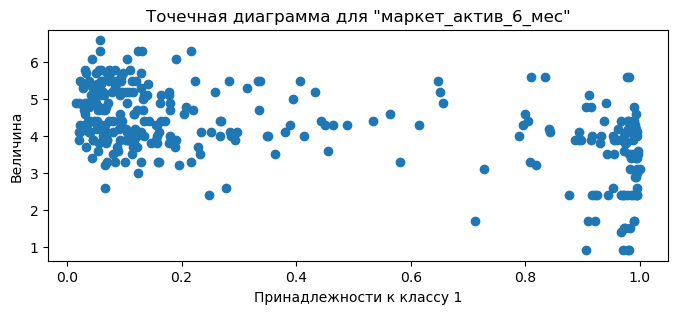

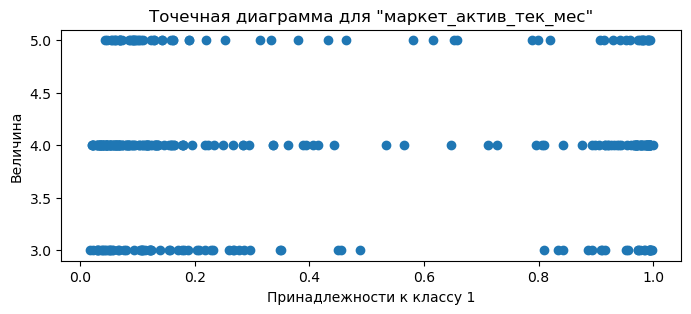

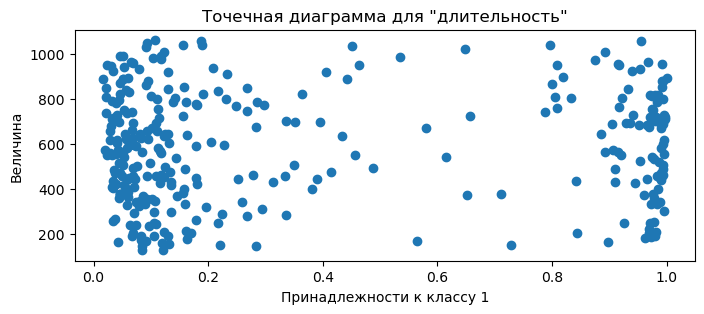

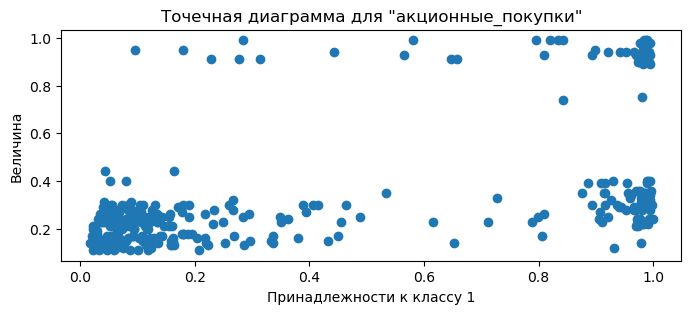

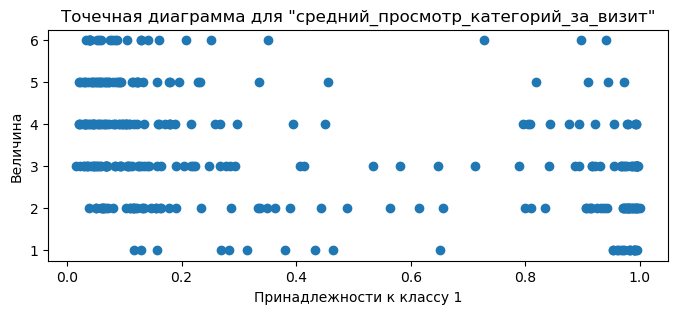

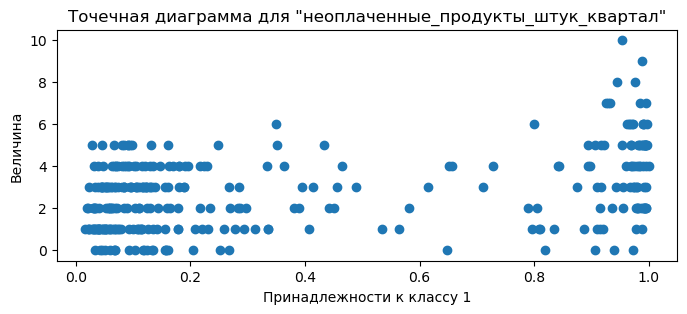

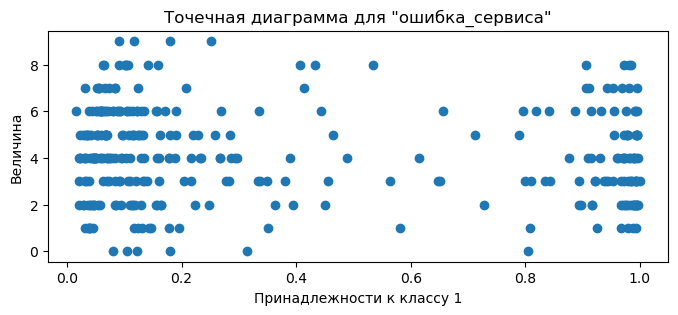

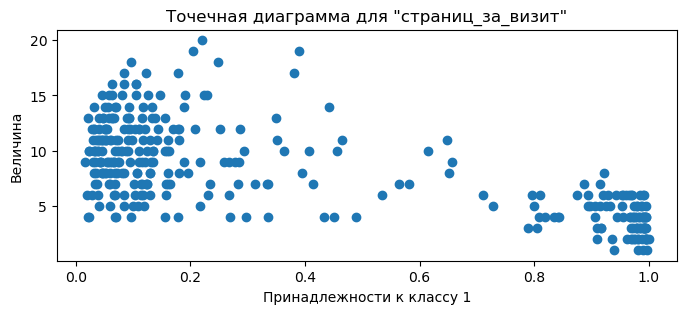

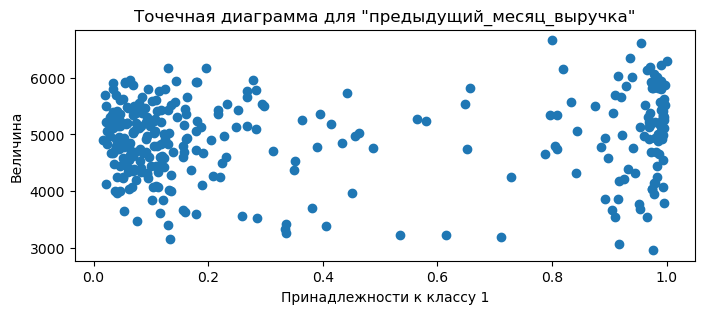

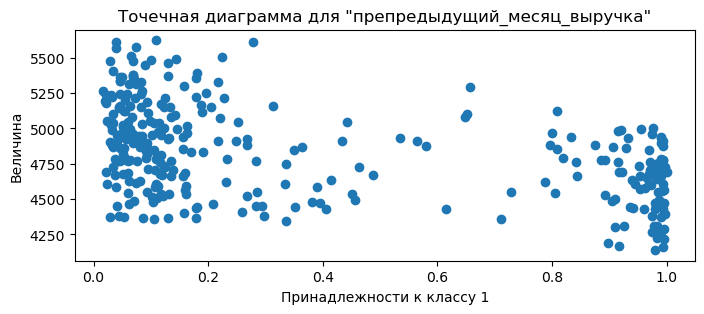

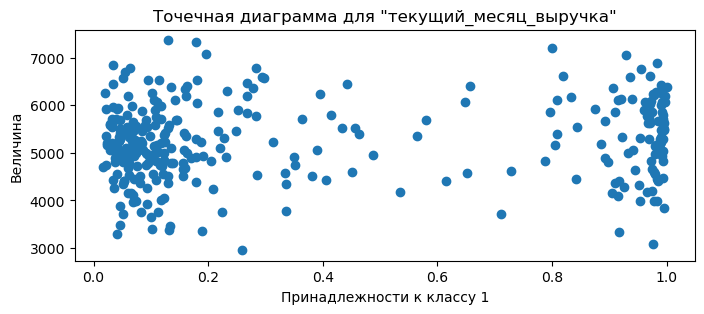

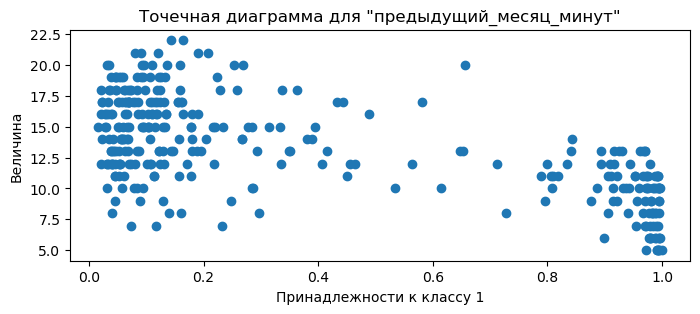

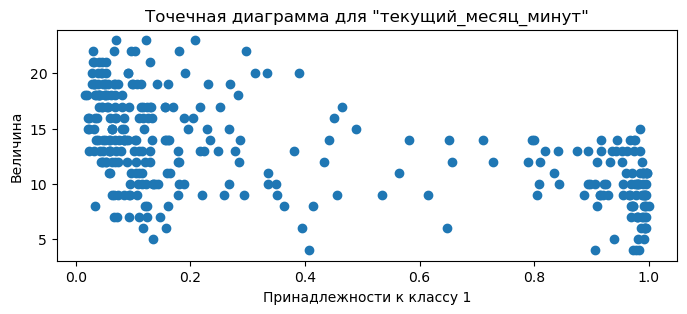

In [136]:
for name in numerical_columns:
    plt.figure(figsize=(8, 3))
    plt.title(f'Точечная диаграмма для "{name}"')
    plt.xlabel('Принадлежности к классу 1')
    plt.ylabel(f'Величина')
    plt.scatter(x=data['вероятность_снижения'], 
                y=data[name])

In [137]:
numerical_columns

['маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит',
 'предыдущий_месяц_выручка',
 'препредыдущий_месяц_выручка',
 'текущий_месяц_выручка',
 'предыдущий_месяц_минут',
 'текущий_месяц_минут']

На основе представленных графиков были определены ключевые пороговые значения признаков, позволяющие дифференцировать покупателей по уровню активности. В частности, для покупателей с пониженной активностью характерны следующие значения:

"маркет_актив_6_мес" — меньше 3,5;

"акционные_покупки" — больше 0.8;

"неоплаченные_продукты_штук_квартал" — больше 5;

"страниц_за_визит" — меньше 6;

"препредыдущий_месяц_выручка" — ниже 4750;

"текущий_месяц_минут" — ниже 13.

In [138]:
filtered_data = data.query('препредыдущий_месяц_выручка < 4750')

In [139]:
unfiltered_data=data.query('препредыдущий_месяц_выручка >= 4750')

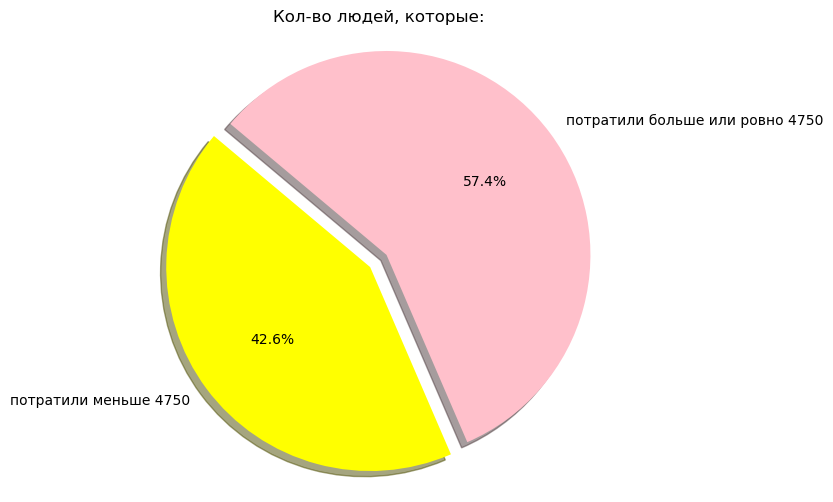

In [140]:
labels = ['потратили меньше 4750', 'потратили больше или ровно 4750']
sizes = [len(filtered_data), len(unfiltered_data)]
colors = ['yellow', 'pink']
explode = (0.1, 0)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Кол-во людей, которые:');

C:\Users\User\AppData\Local\Temp\ipykernel_13320\1911748279.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 3))


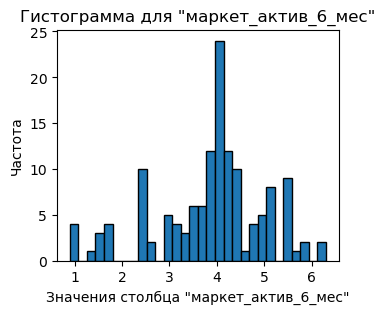

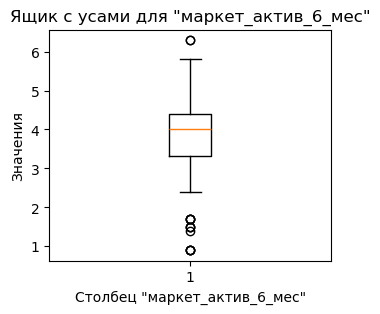

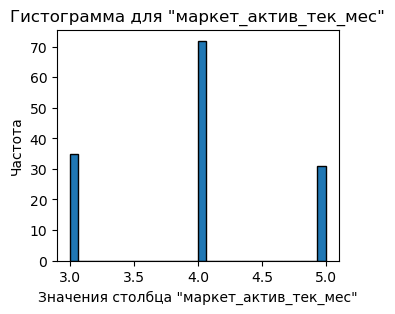

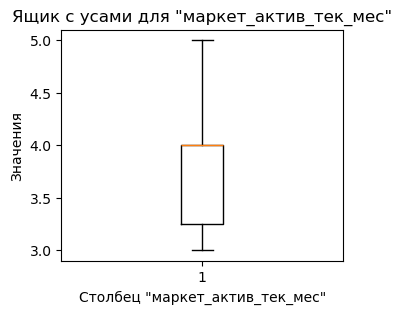

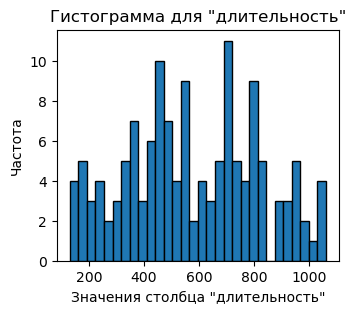

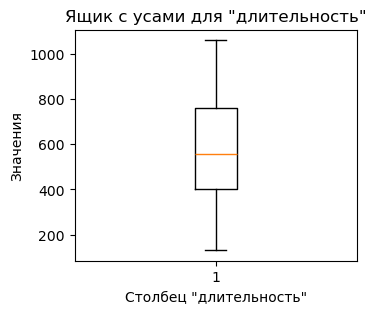

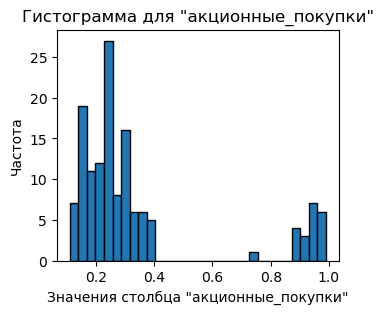

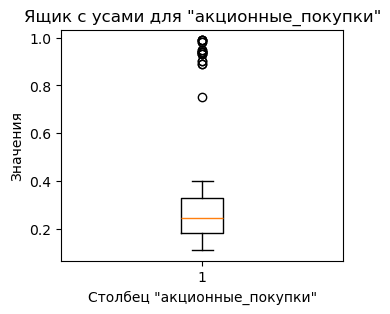

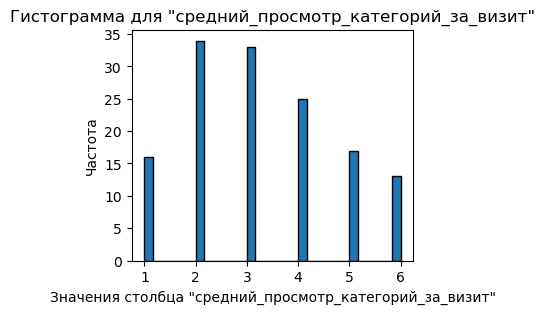

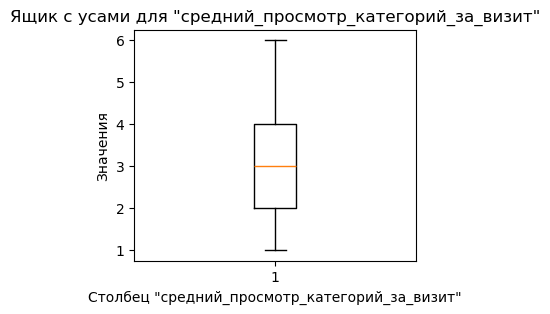

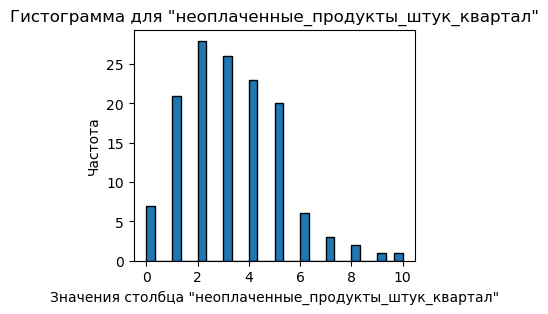

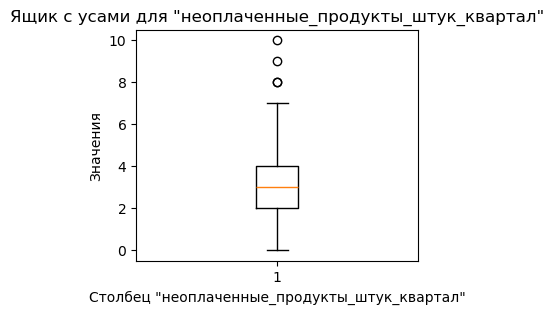

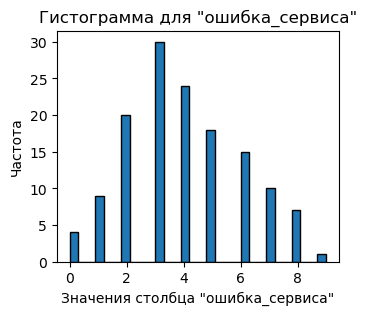

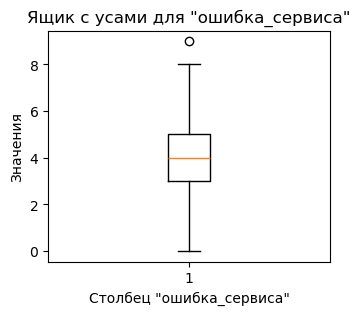

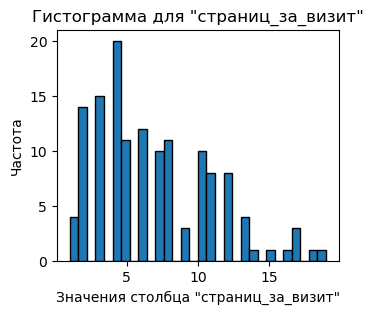

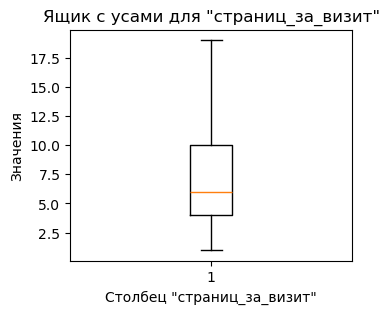

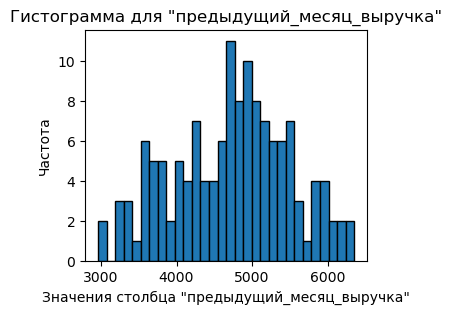

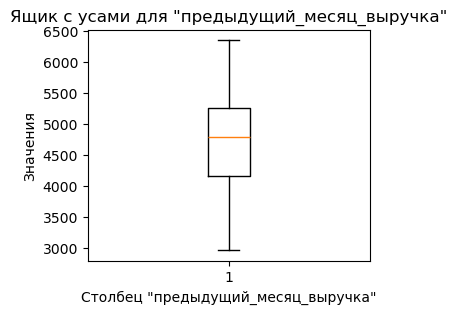

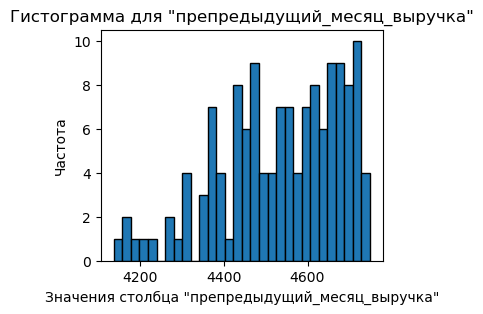

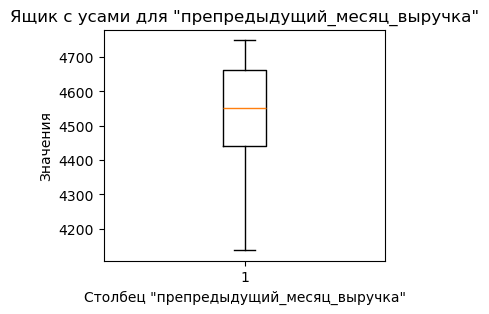

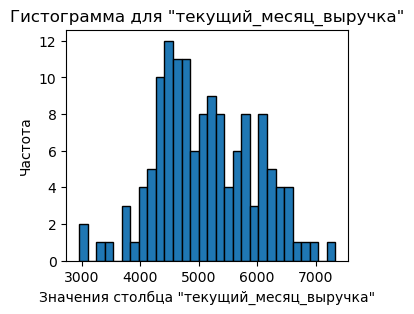

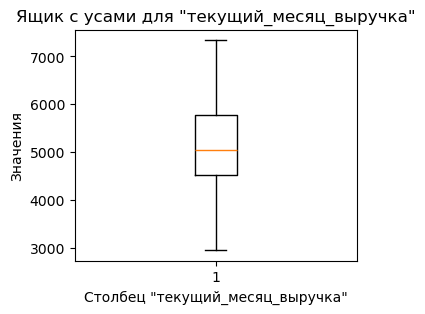

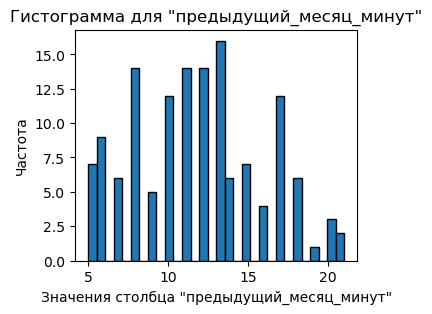

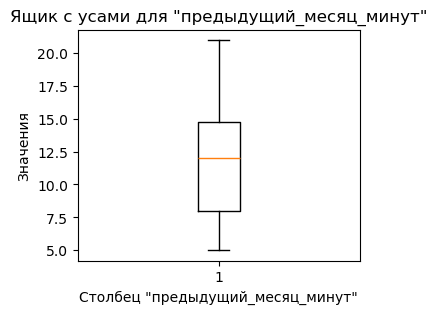

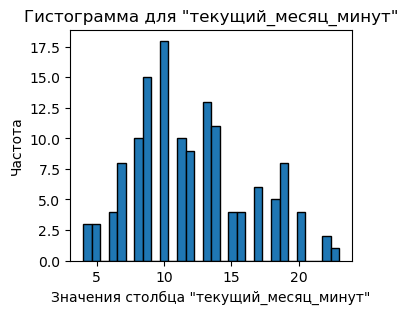

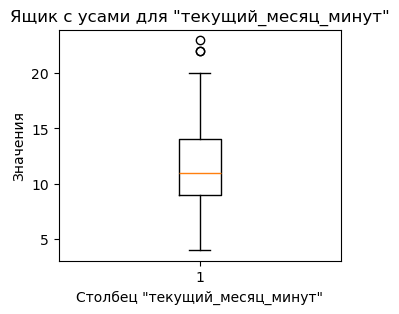

In [141]:
for column in numerical_columns:
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.hist(filtered_data[column], bins=30, edgecolor='black')
    plt.xlabel(f'Значения столбца "{column}"')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма для "{column}"')
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.boxplot(filtered_data[column])
    plt.xlabel(f'Столбец "{column}"')
    plt.ylabel('Значения')
    plt.title(f'Ящик с усами для "{column}"');

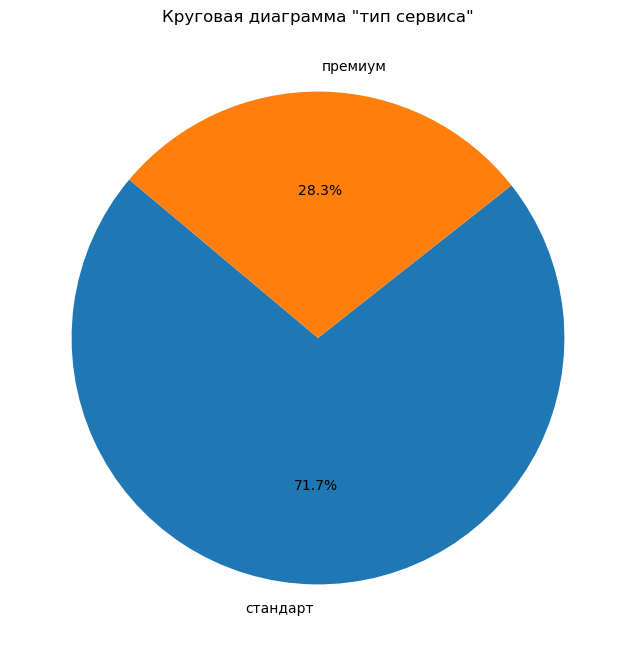

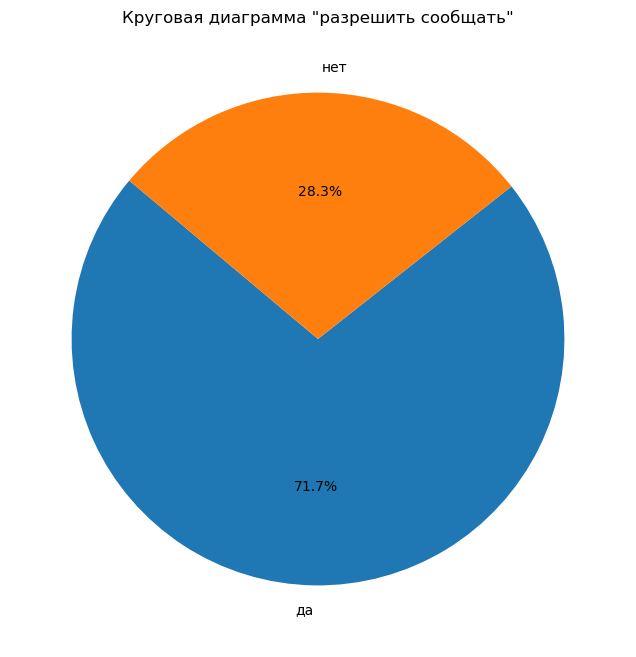

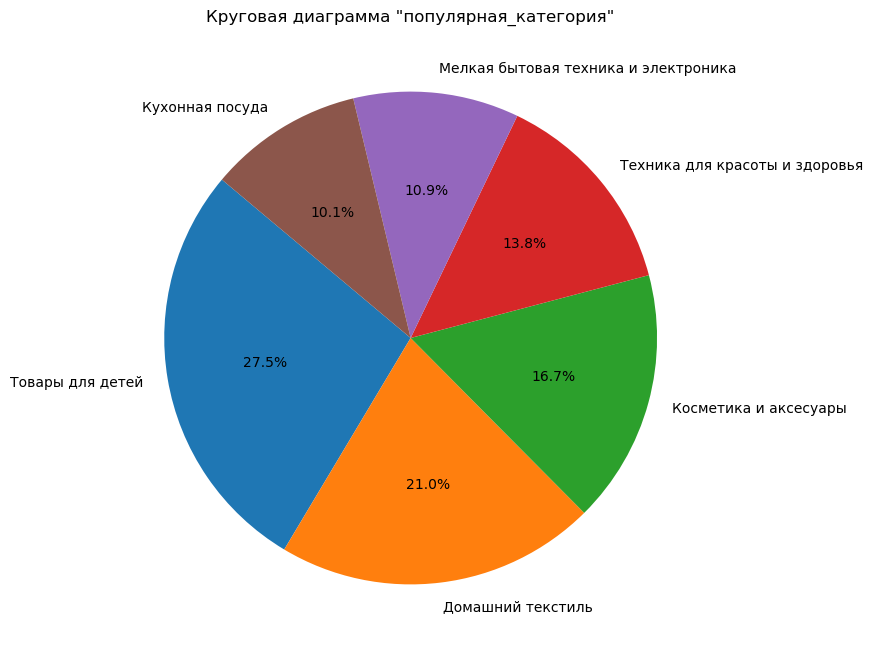

In [143]:
for column in categorical_columns:
    counts = filtered_data[column].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(counts,  labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Круговая диаграмма "{column}"')

- Преобладающая часть представителей этой группы согласилась на получение маркетинговых сообщений.

- Наиболее востребованными категориями среди этой аудитории являются: товары для детей, домашний текстиль, а также косметика и аксессуары.

Исходя из этого, можно предположить, что предложение специальных акций по этим направлениям может стимулировать повышение покупательской активности у данной категории клиентов.

# Общий вывод

В ходе анализа данных были выполнены следующие шаги:

1. Предварительная обработка данных:

    - Приведены названия столбцов к нижнему регистру.

    - Исправлены опечатки и неявные дубликаты.

    - Изменен тип данных в столбце "прибыль".

    - Проверены и удалены выбросы в столбце "выручка".

    - Устранены клиенты с покупательской активностью менее трех месяцев.


2. Анализ распределения признаков:

    - Построены гистограммы и графики боксплота для числовых признаков.

    - Построены круговые диаграммы для категориальных признаков.

    - Выявлены различия в распределении признаков между покупателями с разной активностью.


3. Интеграция и трансформация данных:

    - Объединены таблицы по столбцу 'id'.

    - Созданы новые столбцы для анализа динамики выручки и времени пребывания на сайте.

    - Определена сильная корреляция между предыдущей и текущей месячной выручкой.


4. Моделирование и оценка:

    - Разделены данные для обучения и тестирования.

    - Созданы пайплайны для предобработки данных.

    - Выявлена лучшая метрика для оценки модели.


5. Выводы и рекомендации:

    - Многие признаки, включая продолжительность пребывания на сайте и количество просмотренных страниц, имеют схожую значимость.

    - Наиболее важными факторами являются период с момента регистрации и время, затрачиваемое на посещение сайта.

    - Преобладающая часть клиентов согласилась на получение маркетинговых сообщений.

    - Наиболее востребованными категориями являются товары для детей, домашний текстиль, косметика и аксессуары.

Исходя из анализа, рекомендуется предлагать специальные акции по популярным категориям для стимулирования повышения покупательской активности. Это может помочь улучшить взаимодействие с клиентами и повысить их лояльность.